Gerekli kütüphaneler import edildi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fileName = "datasetDuzenlenmisHali_5000.csv"
df=pd.read_csv(fileName, sep=';')

In [3]:
df.head(10)

,cinsiyet,egitimSeviyesi,meslekGrubu,yillikGelir,yasadigiOrtam,arabaVarMi,mulkVarMi,medeniHal
0,Erkek,Ortaokul,GuvenlikPersoneli,1125000,KendiEvi,Evet,Evet,Evli
1,Kadin,Ortaokul,SatisPersoneli,2700000,KendiEvi,Hayir,Evet,Bekar
2,Kadin,Ortaokul,SatisPersoneli,2700000,KendiEvi,Hayir,Evet,Bekar
3,Kadin,Ortaokul,SatisPersoneli,2700000,KendiEvi,Hayir,Evet,Bekar
4,Kadin,Ortaokul,SatisPersoneli,2700000,KendiEvi,Hayir,Evet,Bekar
5,Erkek,Lise,Muhasebeci,2700000,KendiEvi,Evet,Evet,Evli
6,Erkek,Ortaokul,TarimIscisi,1350000,KendiEvi,Evet,Evet,Evli
7,Erkek,Ortaokul,TarimIscisi,1350000,KendiEvi,Evet,Evet,Evli
8,Erkek,Ortaokul,TarimIscisi,1350000,KendiEvi,Evet,Evet,Evli
9,Erkek,Ortaokul,TarimIscisi,1350000,KendiEvi,Evet,Evet,Evli


Veri seti satır, sütun sayısı

In [4]:
df.shape

(5000, 8)

Verilere genel bakış

In [5]:
for column in ['cinsiyet','egitimSeviyesi', 'meslekGrubu','yasadigiOrtam', 'arabaVarMi','mulkVarMi',
          'medeniHal']:
    print(df[column].value_counts())

Kadin    3102
Erkek    1898
Name: cinsiyet, dtype: int64
Ortaokul    3461
Lise        1313
LiseTerk     185
Ilkokul       41
Name: egitimSeviyesi, dtype: int64
TarimIscisi                 1210
TecrubeliCalisan             772
SatisPersoneli               735
Yonetici                     592
Sofor                        439
UzmanPersonel                274
SaglikPersoneli              220
Muhasebeci                   196
Asci                         165
GuvenlikPersoneli            116
TemizlikPersoneli             98
OzelHizmetPersoneli           63
Sekreter                      26
Isci                          24
Emlakci                       24
Garson                        23
InsanKaynaklariPersoneli      18
BTPersoneli                    5
Name: meslekGrubu, dtype: int64
KendiEvi            4444
Kira                 290
AilesiyleYasiyor     266
Name: yasadigiOrtam, dtype: int64
Hayir    2738
Evet     2262
Name: arabaVarMi, dtype: int64
Evet     3656
Hayir    1344
Name: mulkVarMi, d

Verilere genel bakış grafiği

cinsiyet Tablosu: Veri Sayısı = 2


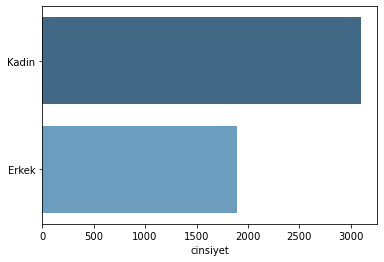

egitimSeviyesi Tablosu: Veri Sayısı = 4


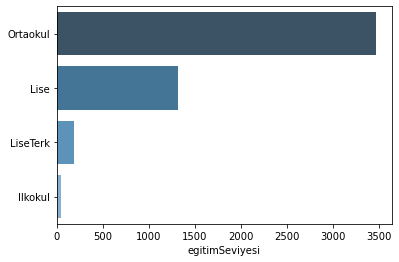

meslekGrubu Tablosu: Veri Sayısı = 18


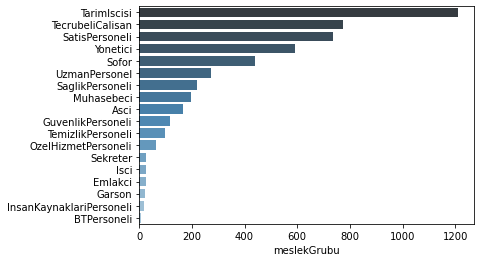

yasadigiOrtam Tablosu: Veri Sayısı = 3


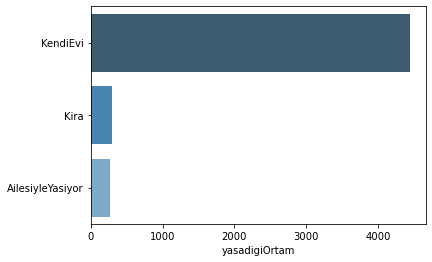

arabaVarMi Tablosu: Veri Sayısı = 2


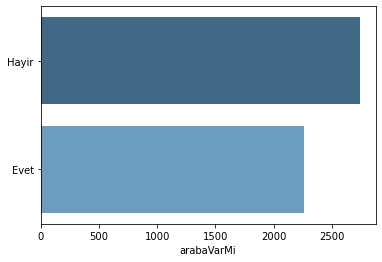

mulkVarMi Tablosu: Veri Sayısı = 2


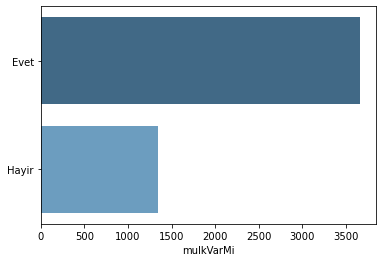

medeniHal Tablosu: Veri Sayısı = 2


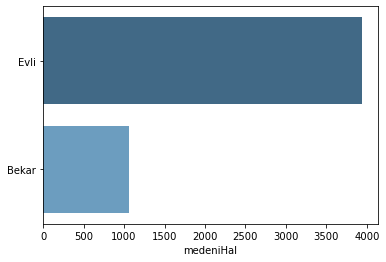

In [6]:
df_cat = df[['cinsiyet','egitimSeviyesi', 'meslekGrubu','yasadigiOrtam', 'arabaVarMi','mulkVarMi',
          'medeniHal']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("%s Tablosu: Veri Sayısı = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num, y=cat_num.index, palette="Blues_d", orient='h')
    plt.show()

Her kategorik sütun içerisinde medeniHal oran grafiği

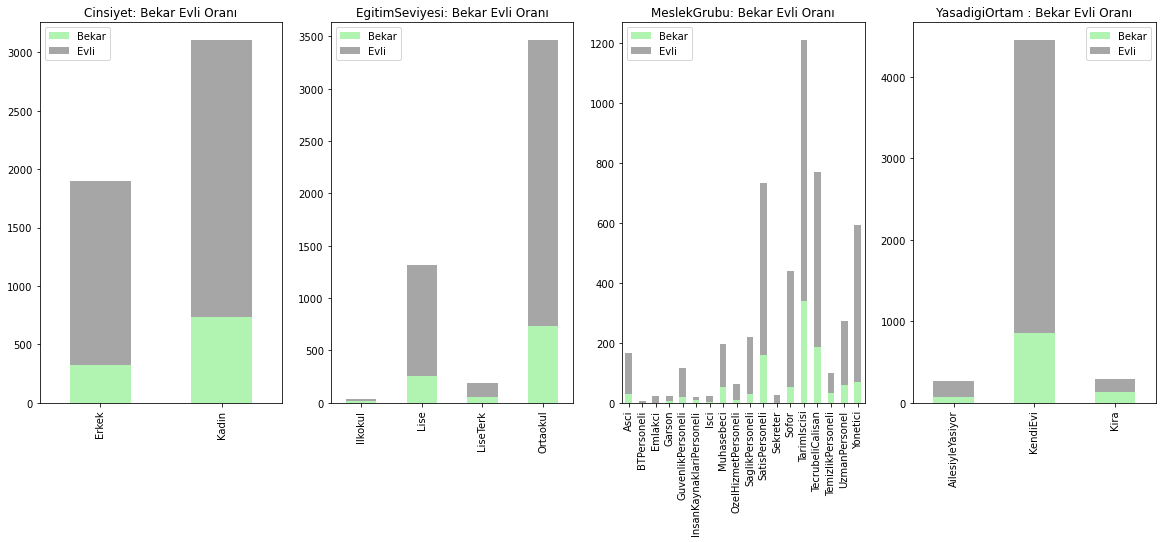

In [7]:
f, axes = plt.subplots(1,4, figsize = (20,7))

cinsiyet = df_cat.groupby(['cinsiyet','medeniHal']).cinsiyet.count().unstack()
p1 = cinsiyet.plot(kind = 'bar', stacked = True, 
                   title = 'Cinsiyet: Bekar Evli Oranı', 
                   color = ['lightgreen','grey'], alpha = .70, ax = axes[0])
p1.set_xlabel('')
p1.legend(['Bekar','Evli'])


egitimSeviyesi = df_cat.groupby(['egitimSeviyesi','medeniHal']).egitimSeviyesi.count().unstack()
p2 = egitimSeviyesi.plot(kind = 'bar', stacked = True, 
                    title = 'EgitimSeviyesi: Bekar Evli Oranı', 
                    color = ['lightgreen','grey'], alpha = .70, ax = axes[1])
p2.set_xlabel('')
p2.legend(['Bekar','Evli'])

meslekGrubu = df_cat.groupby(['meslekGrubu','medeniHal']).meslekGrubu.count().unstack()
p3 = meslekGrubu.plot(kind = 'bar', stacked = True,
                   title = 'MeslekGrubu: Bekar Evli Oranı',
                   color = ['lightgreen','grey'], alpha = .70, ax = axes[2])
p3.set_xlabel('')
p3.legend(['Bekar','Evli'])

yasadigiOrtam = df_cat.groupby(['yasadigiOrtam','medeniHal']).yasadigiOrtam.count().unstack()
p4 = yasadigiOrtam.plot(kind = 'bar', stacked = True,
                   title = 'YasadigiOrtam : Bekar Evli Oranı',
                   color = ['lightgreen','grey'], alpha = .70, ax = axes[3])
p4.set_xlabel('')
p4.legend(['Bekar','Evli'])

plt.show()